# Segmentation panoptique des noyaux et des tissus dans le mélanome avancé (PUMA)
## Projet deep learning

Bonjour à tous,

Nous allons vous présenter notre projet de deep learning sur la segmentation et classification des noyaux cellulaires dans le mélanome.

Dans ce projet, nous avons travaillé sur l'application de méthodes et modèles de deep  sur la segmentation et classification des noyaux cellulaires et tissus dans les images histopathologiques du mélanome en utilisant des techniques de deep learning.

Ce projet se base sur le concours PUMA organisé par le consortium de recherche sur le mélan

Nous nous basons sur l'article scientifique : "PUMA: A dataset for deep learning-based nuclei and tissue segmentation in advanced melanoma with improved biomarker potential" publié dans GigaScience en 2024.

Ce travail s'inscrit dans une démarche d'amélioration des biomarqueurs pronostiques pour le mélanome avancé.

# 1. Contexte

## Le mélanome et ses biomarqueurs

- Mélanome : cancer agressif de la peau en augmentation
- 50% des patients ne répondent pas à l'immunothérapie
- Les lymphocytes infiltrant la tumeur (TILs) = biomarqueur pronostique clé
- Limites actuelles : évaluation manuelle subjective et variable

Le mélanome est une forme particulièrement agressive de cancer cutané dont l'incidence augmente globalement. Bien que le mélanome primaire soit souvent traité par excision chirurgicale, le mélanome avancé nécessite une immunothérapie par inhibiteurs de points de contrôle immunitaires.

Malheureusement, environ la moitié des patients ne répondent pas à cette thérapie, qui est coûteuse et potentiellement toxique. Il est donc crucial d'identifier des biomarqueurs capables de prédire la réponse au traitement.

Les lymphocytes infiltrant la tumeur (TILs) sont reconnus comme un biomarqueur pronostique important, mais leur évaluation manuelle est subjective, chronophage et souffre d'une variabilité inter-observateurs considérable.

Ces limitations motivent le développement d'approches automatisées basées sur l'intelligence artificielle pour quantifier et caractériser les TILs de manière plus objective et reproductible.

## Défis Spécifiques au Mélanome

- Cellules de mélanome mimétiques imitant d'autres types cellulaires
- Modèles génériques (HoverNet sur PanNuke) : performance sous-optimale
- Confusion fréquente entre cellules tumorales/lymphocytes/stromales

→ Nécessité d'un modèle spécifique au mélanome

L'analyse histopathologique du mélanome présente des défis spécifiques qui compliquent l'application des modèles d'IA existants :

1. Les cellules de mélanome ont une capacité unique à imiter morphologiquement d'autres types cellulaires, rendant leur identification automatique particulièrement difficile.

2. Les modèles génériques comme HoverNet, même lorsqu'ils sont pré-entraînés sur des datasets comme PanNuke (qui inclut des échantillons de peau), montrent des performances sous-optimales sur les images de mélanome.

3. Ces modèles confondent fréquemment les cellules tumorales avec des lymphocytes ou des cellules stromales, compromettant ainsi l'évaluation précise des TILs.

4. Les méthodes manuelles actuelles souffrent également d'une grande variabilité dans l'évaluation de la localisation des TILs (intratumorale vs péritumorale), qui est pourtant cruciale pour évaluer leur valeur pronostique.

Ces défis justifient le développement d'un modèle spécifiquement adapté au mélanome, entraîné sur des données annotées de haute qualité.

## Jeu de données (PUMA)

- Régions tumorales 
  - 155 mélanomes primaires
  - 155 mélanomes métastatiques
  - Images TIFF H&E à 40x (1024×1024 pixels)
- Annotations de zones en GeoJSON validées par un dermato-pathologiste :
  - Noyaux :
    - Zone : polygone
    - Classe : tumeur, lymphocytes, plasmocytes ... (10 classes)
  - Tissus : tumeur, stroma, épiderme, vaisseaux sanguins ... (5 classes)
    - Zone : polygone(s)
    - Classe : tumeur, épiderme, vaisseaux sanguins ... (5 classes)
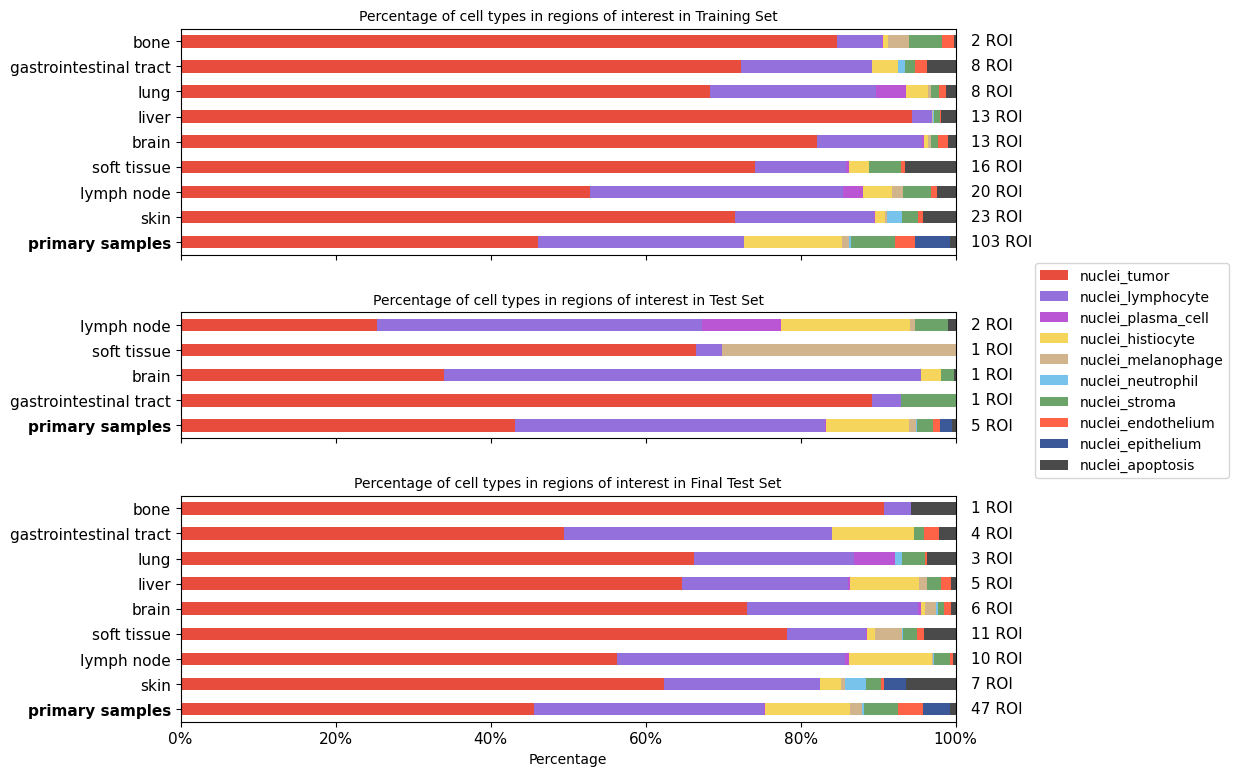

Le dataset PUMA (Panoptic segmentation of nUclei and tissue in MelanomA) constitue la première base de données spécifique au mélanome pour la segmentation panoptique des noyaux cellulaires et des tissus :

- Il comprend 155 régions d'intérêt (ROIs) de mélanomes primaires et 155 de mélanomes métastatiques, offrant ainsi un échantillonnage représentatif de la diversité morphologique de cette pathologie.

- Les images sont des coupes histologiques colorées à l'hématoxyline et à l'éosine (H&E), numérisées à un grossissement de 40x avec une résolution de 1024×1024 pixels.

- Chaque ROI est accompagnée d'une ROI contextuelle de 5120×5120 pixels centrée autour d'elle, permettant d'analyser l'environnement tissulaire plus large.

- Les annotations des noyaux cellulaires identifient 10 types distincts : tumeur, lymphocytes, plasmocytes, histiocytes, mélanophages, neutrophiles, cellules stromales, épithélium, endothélium et cellules apoptotiques.

- Les annotations tissulaires comprennent 5 catégories : tumeur, stroma, épithélium, vaisseaux sanguins et zones nécrotiques.

- Toutes les annotations ont été réalisées par un professionnel médical et vérifiées par un dermato-pathologiste certifié, garantissant leur qualité et leur pertinence clinique.

Ce jeu de données unique permet de développer et d'évaluer des modèles spécifiques au mélanome avec un niveau de granularité sans précédent.

## Jeu de données (PUMA)

![./images/6f3736bd-a0f5-42a7-8d54-98852b7e6af1.png](./images/6f3736bd-a0f5-42a7-8d54-98852b7e6af1.png)

## Principe

Il y a 2 tâches : 

1. Noyaux cellulaires
   1. Segmentation
   2. Classification (10 classes)
2. Segmentation des tissus
   1. Segmentation
   2. Classification (5 classes)

Pour permettre le diagnostic et le pronostic du mélanome, il est essentiel de segmenter et classifier les noyaux cellulaires et les tissus dans les images histopathologiques.

Il s'agit de deux tâches de segmentation panoptique, où chaque pixel d'une image est classé en fonction de son appartenance à une catégorie spécifique.

Attention, il faut bien faire la différence entre la segmentation panoptique et la segmentation sémantique. 

La segmentation panoptique consiste à segmenter chaque pixel d'une image en lui attribuant une étiquette de classe, tout en tenant compte de la hiérarchie des objets présents dans l'image. En revanche, la segmentation sémantique se concentre uniquement sur l'attribution d'étiquettes de classe aux pixels, sans tenir compte de la hiérarchie ou des relations entre les objets.

Ainsi, il à la fois une tâche de segmentation sémantique (identifier les classes) et une tâche de détection d'objets (identifier les instances).

Il faut donc 2 modèles : un pour la segmentation des noyaux et un pour la segmentation des tissus.

# 2. Méthodologie

1. Etat de l'art 
2. Prétraitement
3. Modèle
4. Entraînement
5. Évaluation
6. Interprétation

La méthodologie de ce projet se décline en plusieurs étapes clés :

1. **État de l'art** : Analyse des méthodes existantes pour la segmentation et la classification des noyaux cellulaires et des tissus dans les images histopathologiques, en mettant l'accent sur les défis spécifiques au mélanome. Cette étape est réalisée en consultant la littérature scientifique et également en demandant à ChatGPT de faire une revue de la littérature sur le sujet.
2. **Prétraitement** : Préparation des données, y compris la normalisation des images, l'augmentation des données et la création de masques d'annotation pour les noyaux et les tissus.
3. **Modèle** : Sélection et adaptation d'un modèle de deep learning pour la segmentation panoptique, en tenant compte des spécificités du mélanome.
4. **Entraînement** : Entraînement du modèle sur le jeu de données PUMA, en utilisant des techniques d'optimisation et de régularisation pour améliorer la performance.
5. **Évaluation** : Évaluation des performances du modèle sur un ensemble de test indépendant, en utilisant des métriques appropriées pour la segmentation et la classification.
6. **Interprétation** : Analyse des résultats obtenus, identification des forces et des faiblesses du modèle, et discussion des implications cliniques potentielles.

# 3. Projet

Nous avons essayé les modèles suivants :
- Segmentation des noyaux :
  - CellVit++
- Segmentation des tissus :
  - HoVer-Net
  - nnU-Net

## HoVer-Net

## CellVit++



## nnU-Net

# 4. Résultats

## CellVit++

## HoVer-Net

## nnU-Net

Impossible de lancer un apprentissage : 
  - Environnement incompatible ?
  - Dépendances ?

Dépannage compliqué car aucun message d'erreur (processus bloqué).

```sh
Date: Tue Apr 29 12:41:03 PM CEST 2025
Noeud: juliet4
Job ID: 22392
Partition: mesonet
Compte: m25031
GPUs alloués: 0
nnUNet_preprocessed set to: /home/alanneraud/Deep_learning_project/nnunet/nnUNet_preprocessed
nnUNet_raw set to: /home/alanneraud/Deep_learning_project/nnunet/nnUNet_raw
nnUNet_results set to: /home/alanneraud/Deep_learning_project/nnunet/nnUNet_results
Activation de l'environnement uv: /home/alanneraud/Deep_learning_project/nnunet/.venv
Python 3.10.17
PyTorch et nnUNet (avec trainer custom) sont supposés être installés dans l'environnement uv.
Vérification de la disponibilité du GPU via PyTorch...
PyTorch version: 2.7.0+cu126
CUDA available: True
Device count: 1
Current device: 0
Device name: NVIDIA A100-SXM4-80GB
Fin de la vérification PyTorch GPU.
Étape 5: Lancement du pré-entraînement (Task 2 - NSCLC) avec nnUNetTrainerIgnoreIndex et plans nnUNetPlans_pretrain...
```

Concernant l’entraînement de nnU-Net, il nous a été impossible de lancer un entraînement car il se mettait à freeze.

# 5. Conclusion

## Critique

- **Occupation des nœuds :**
  - Queue d'attente importante
  - Plantage partiel de `juliet2` et `juliet4`
- **Qualité de l'implémentation des modèles :**
  - Gestion insuffisante des erreurs.
  - Manque de clarté et de robustesse du code.
- **Stabilité et dépendances des modèles :**
  - Difficultés liées à la gestion des versions des librairies.
  - Instabilité potentielle des environnements d'exécution.
- **Maintenance et support des modèles :**
  - Peu de suivi des problèmes signalés (issues).
  - Manque de réactivité sur les contributions (pull requests).

Au cours de ce projet, l'exploitation des modèles existants a présenté plusieurs défis.

1. la gestion des ressources informatiques a été problématique. La queue d'attente pour accéder aux nœuds de calcul était souvent longue, ce qui a entraîné des retards dans le démarrage des expériences. De plus, le nœud `juliet2` a rencontré des problèmes de stabilité, il était impossible d'utiliser les ressources graphiques sur ce dernier, tandis que le nœud `juliet4` a été partiellement bloqué par une tâche qui ne se termine jamais.

2. La qualité de l'implémentation de certains outils s'est avérée perfectible. Par exemple, une gestion limitée des exceptions a entraîné des arrêts inattendus du programme, parfois sans message d'erreur explicite, compliquant le débogage.

3. La stabilité des modèles a été affectée par une gestion imprécise des dépendances. Il a fallu tester itérativement différentes versions de librairies pour assurer la compatibilité et le bon fonctionnement, ce qui a ralenti le processus de développement.

4. Le manque de maintenance active et de support communautaire pour certains des outils utilisés a été un frein. Les problèmes signalés par la communauté (issues GitHub) restent souvent sans réponse, et les propositions d'amélioration (pull requests) ne sont pas intégrées, ce qui soulève des questions sur la pérennité et la fiabilité à long terme de ces outils.

## Impact

- **Impact environnemental :**
  - Fabrication des puces
  - Consommation énergétique

- **Impact politique :** 
  - Dépendance à l'égard de Taïwan (TSMC) pour la fabrication des puces
  - Dépendance à l'égard de la Chine pour les terres rares
  - Dépendance à l'égard des États-Unis pour les logiciels et les licences (ROCm et CUDA)

- **Impact Clinique et Sociétal :**
  - Amélioration du diagnostic/pronostic
  - Optimisation du flux de travail
  - Aide à la décision thérapeutique
  - Potentiel de réduction des coûts

Enfin, abordons l'impact de ce type de projet et des technologies sous-jacentes.

Sur le plan **environnemental**, il faut considérer l'empreinte liée à la fabrication des puces électroniques. Cela inclut l'extraction et la purification de grandes quantités de silicium, issu du sable, pour créer les *wafers* sur lesquels sont gravées les puces mémoire (VRAM) et les processeurs graphiques (GPU). La fabrication des GPU est particulièrement gourmande : leurs *dies* (les puces individuelles) sont très larges, ce qui augmente le taux de perte lors de la découpe des *wafers*. À cela s'ajoute la consommation énergétique significative des usines de fabrication (*fabs*), des centres de données et des phases d'entraînement des modèles.

D'un point de vue **politique et économique**, nous observons une forte dépendance géostratégique. La production des puces de pointe est concentrée à Taïwan avec TSMC. L'approvisionnement en terres rares, essentielles, dépend largement de la Chine. Les logiciels et écosystèmes comme CUDA ou ROCm sont majoritairement américains. Cependant, l'Europe détient un avantage stratégique majeur avec l'entreprise néerlandaise ASML, qui produit les machines de lithographie EUV (Extreme Ultraviolet) indispensables à la gravure des semi-conducteurs les plus avancés et utilisées par tous les grands fondeurs mondiaux.

Cependant, l'impact le plus direct et positif se situe au niveau **clinique et sociétal**. Ces outils ont le potentiel d'améliorer significativement la précision et la reproductibilité du diagnostic et du pronostic du mélanome. Ils peuvent optimiser le flux de travail des pathologistes, leur permettant de se concentrer sur les cas les plus complexes. En fournissant une analyse plus fine, ils constituent une aide précieuse à la décision thérapeutique, notamment pour prédire la réponse à l'immunothérapie. À terme, cela pourrait même contribuer à une réduction des coûts de santé en évitant des traitements inefficaces.